In [29]:
from google.colab import files

In [30]:
files.upload()

Saving Airlines+Data.xlsx to Airlines+Data (1).xlsx


{'Airlines+Data (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import *
from math import sqrt

In [ ]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.shape

(96, 2)

In [ ]:
#In times series problem alaways make the time column as index
data.set_index('Month',inplace=True)

Step 2 Visiualization of data

In [ ]:
data.dtypes

Passengers    int64
dtype: object

In [ ]:
data.shape

(96, 1)

In [ ]:
# We are going to use rolling avaergae to make data stationary with std deviation constant
# Here we are going to find rolling avarage for period of 12 months or yearly rolling avag and rolling std deviation
rollavg=data.rolling(window=12).mean()
rollstd=data.rolling(window=12).std()

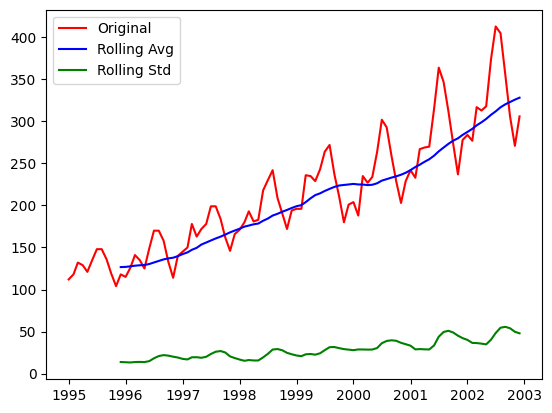

In [ ]:
# from graph below we can see the rolling avg is varying in between 130 to 330 or somthing and hence we need to do some data trandformation
# in above bwlow we can see there are spikes at some point which Shows data has seasonlaity and it also has trend as it is moving in
#upward direction. This means data is not stationary and we neeed to make data stationary in order to perform ARIMA
# https://www.youtube.com/watch?v=f6dwixb-4MM
original=plt.plot(data,label="Original",color="red")
rollavg=plt.plot(rollavg,label="Rolling Avg",color="blue")
rollstd=plt.plot(rollstd,label="Rolling Std",color="green")
plt.legend(loc='best')
plt.show()

In [ ]:
#to make data stationary we use d key fuller test
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Now we doing Tetsing of Hypothesis using adfuller
# HO= Data is not stationary
# H1 = Data is stationary
# We are creating function to do TOH
def adfuller_test(Passangers):
  print('Dickey fuller test:')
  result=adfuller(Passangers)
  lables=['ADF Test Statstics','p-values','#Lags used','Number of Observations used']
  for value,label in zip(result,lables):
    print(label+' : '+str(value))

In [ ]:

adfuller_test(data['Passengers'])

Dickey fuller test:
ADF Test Statstics : 1.3402479596467138
p-values : 0.9968250481137263
#Lags used : 12
Number of Observations used : 83


Data Transformation

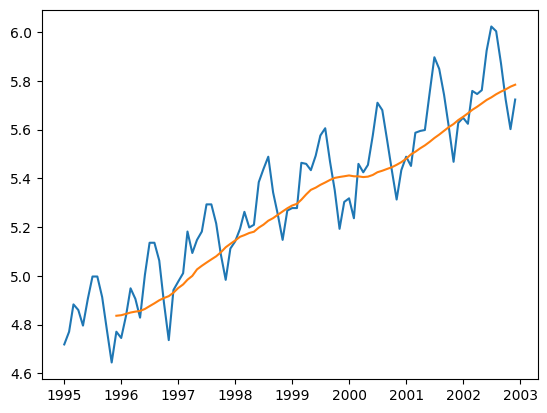

In [ ]:
# Logged data
data_log=np.log(data)
mvg_avg=data_log.rolling(window=12).mean()
mvg_std=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(mvg_avg)
plt.show()

In [ ]:
# data_log diff
data_log_diff=data_log-mvg_avg
data_log_diff.dropna().head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [ ]:
def stationary(timeseries):
  # Calsulating rolling mean and std deviation
  rollmean=timeseries.rolling(window=12).mean()
  rollstd=timeseries.rolling(window=12).std()
  #Plotting graph with orginal data, rollmean and rollstd
  plt.figure(figsize=(10,7))
  original=plt.plot(timeseries,color='red',label="Orginal")
  mean_roll=plt.plot(rollmean,color='blue',label='Rolling mean')
  std_roll=plt.plot(rollstd,color='green',label='Rolling std')
  plt.show(block=False)
  #Dickley Fuller test
  print('Dicky Fuller test')
  result=adfuller(timeseries['Passengers'])
  lables=['ADF Test Statstics','p-values','#Lags used','Number of Observations used']
  for value,label in zip(result,lables):
    print(label+' : '+str(value))

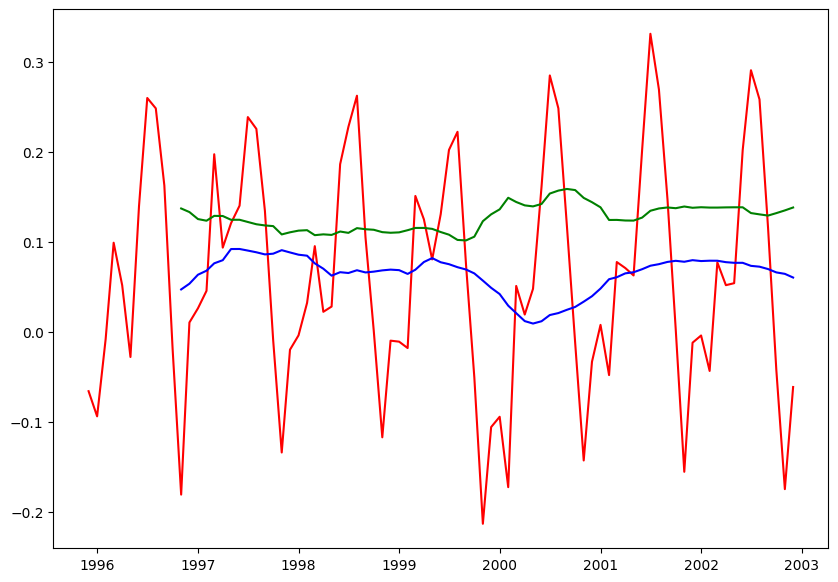

Dicky Fuller test
ADF Test Statstics : -1.9109302496442164
p-values : 0.32693677610720395
#Lags used : 12
Number of Observations used : 72


In [ ]:
stationary(data_log_diff.dropna())

In [ ]:
# Exponential data transformation with exponentially weighted moving average
data_exp=data_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
data_exp_diff=data_log-data_exp

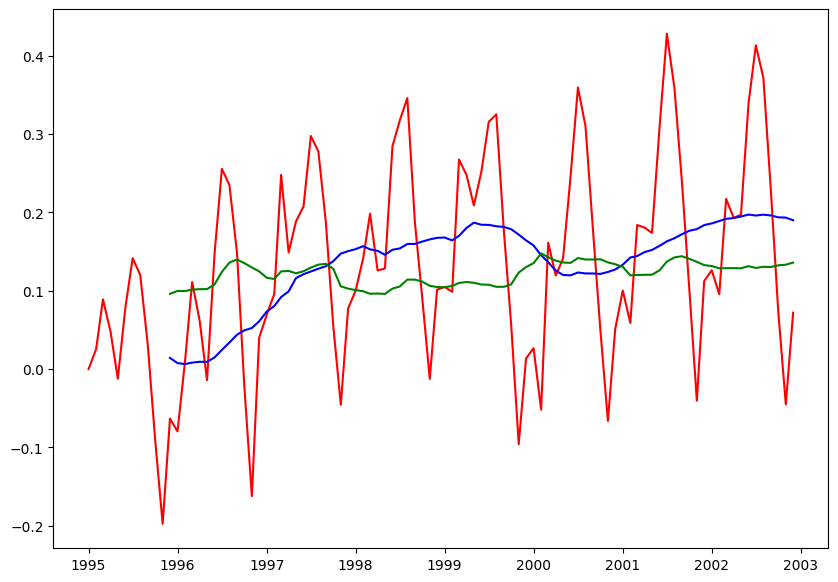

Dicky Fuller test
ADF Test Statstics : -2.835036332481287
p-values : 0.05344073374466823
#Lags used : 12
Number of Observations used : 83


In [ ]:
stationary(data_exp_diff)

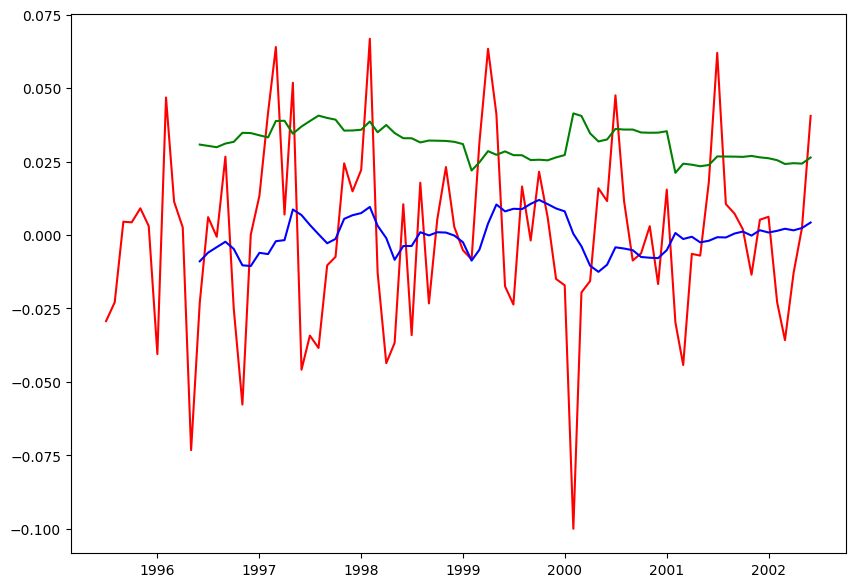

Dicky Fuller test


KeyError: ignored

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid
decomp_data=residual
decomp_data=decomp_data.dropna()
stationary(decomp_data)


In [ ]:
result=adfuller(decomp_data)
lables=['ADF Test Statstics','p-values','#Lags used','Number of Observations used']
for value,label in zip(result,lables):
  print(label+' : '+str(value))

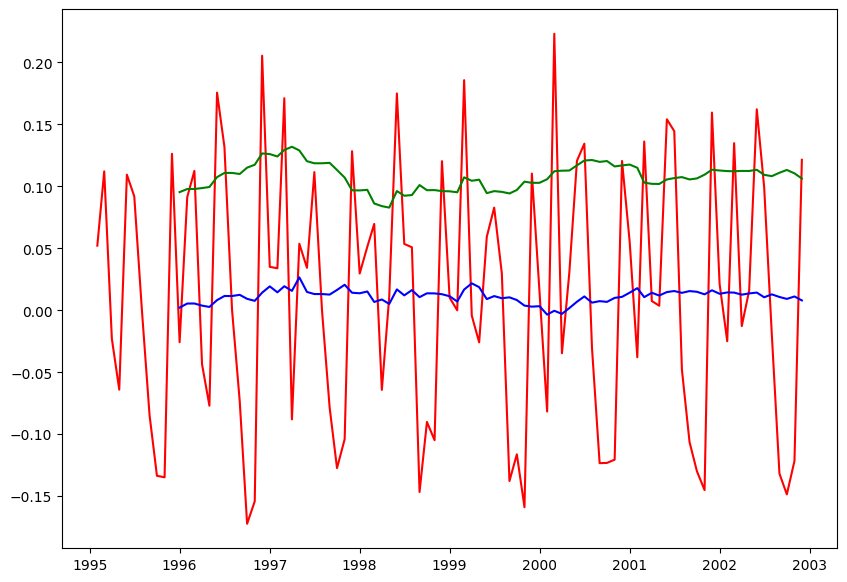

Dicky Fuller test
ADF Test Statstics : -2.670822890269434
p-values : 0.079224690566299
#Lags used : 12
Number of Observations used : 82


In [ ]:
data_shift=data_log-data_log.shift()
data_shift=data_shift.dropna()
stationary(data_shift)

In [ ]:
# we are going to find p,q,d values to run for ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
lag_acf=acf(data_shift,nlags=20)
lag_pacf=pacf(data_shift,nlags=20)

Text(0.5, 1.0, 'Autocorrelation Function')

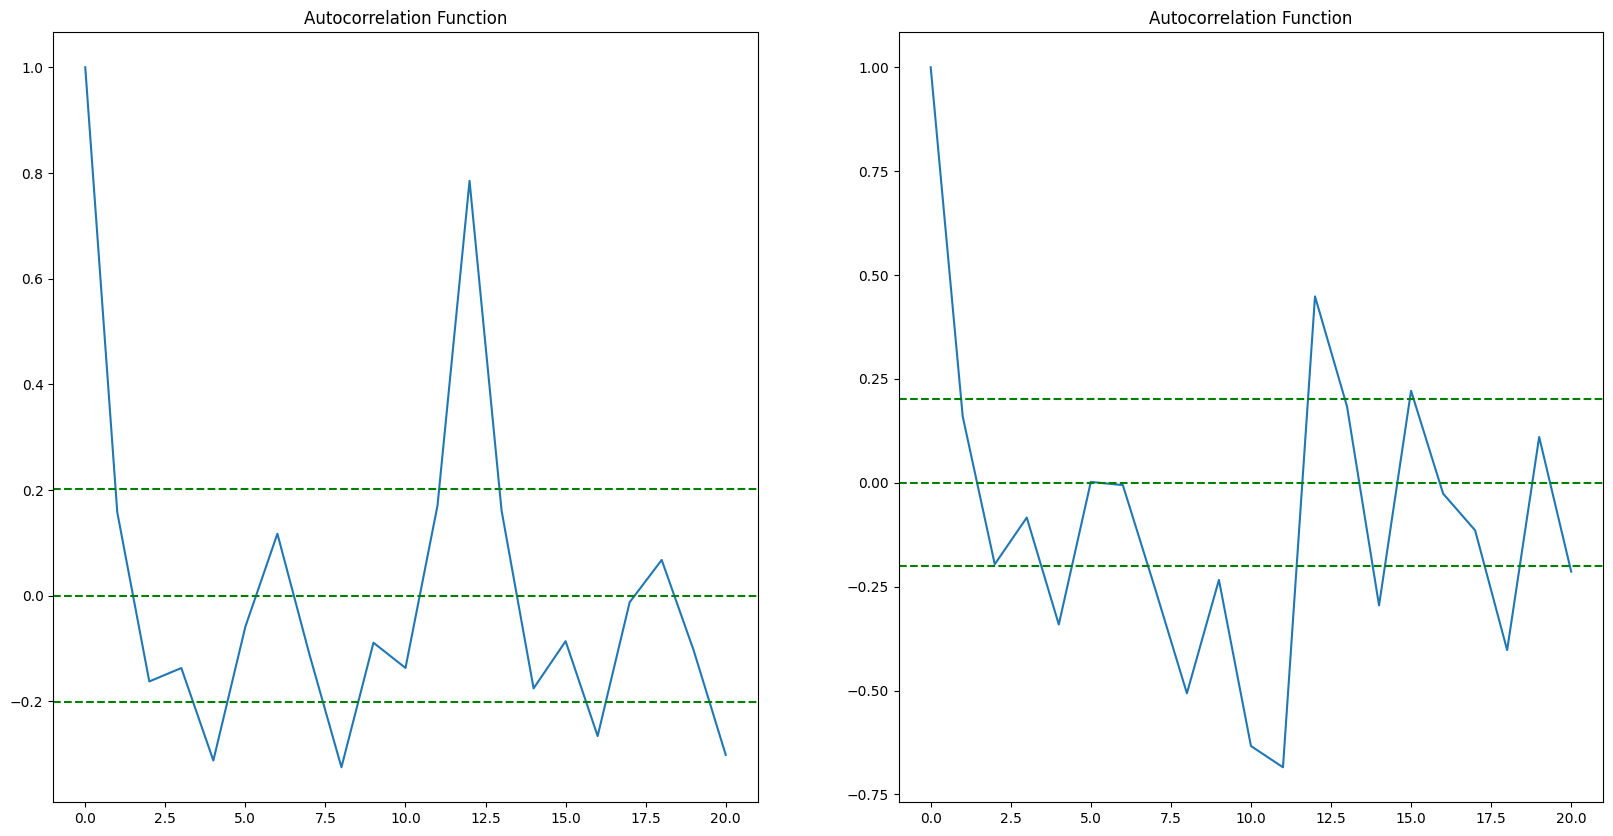

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')


In [ ]:
# from above graph we can fing q and p value to run ARIMA model.
# from 1st graph we can get q value and it where out graph is cutting 0 line and it is aroung 2
# from 2nd graph we can get q value which is also around 2
# and d will be be between 1 and 2
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
data_shift.dropna()

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990
1995-05-01,-0.064022
1995-06-01,0.109484
...,...
2002-08-01,-0.019561
2002-09-01,-0.131769
2002-10-01,-0.148533


In [ ]:
model1 = ARIMA(data_shift, order=(2,1,0))
results_AR = model1.fit(disp=-1)
# plt.plot(airpass_log_diff)
# plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - airpass_log_diff['Passengers'])**2))
# print('Plotting AR model')

NotImplementedError: ignored

In [31]:
import statsmodels.api as sm

In [32]:
model = sm.tsa.arima.ARIMA(data_shift, order=(1,1,2))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [33]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


plotting ARIMA model


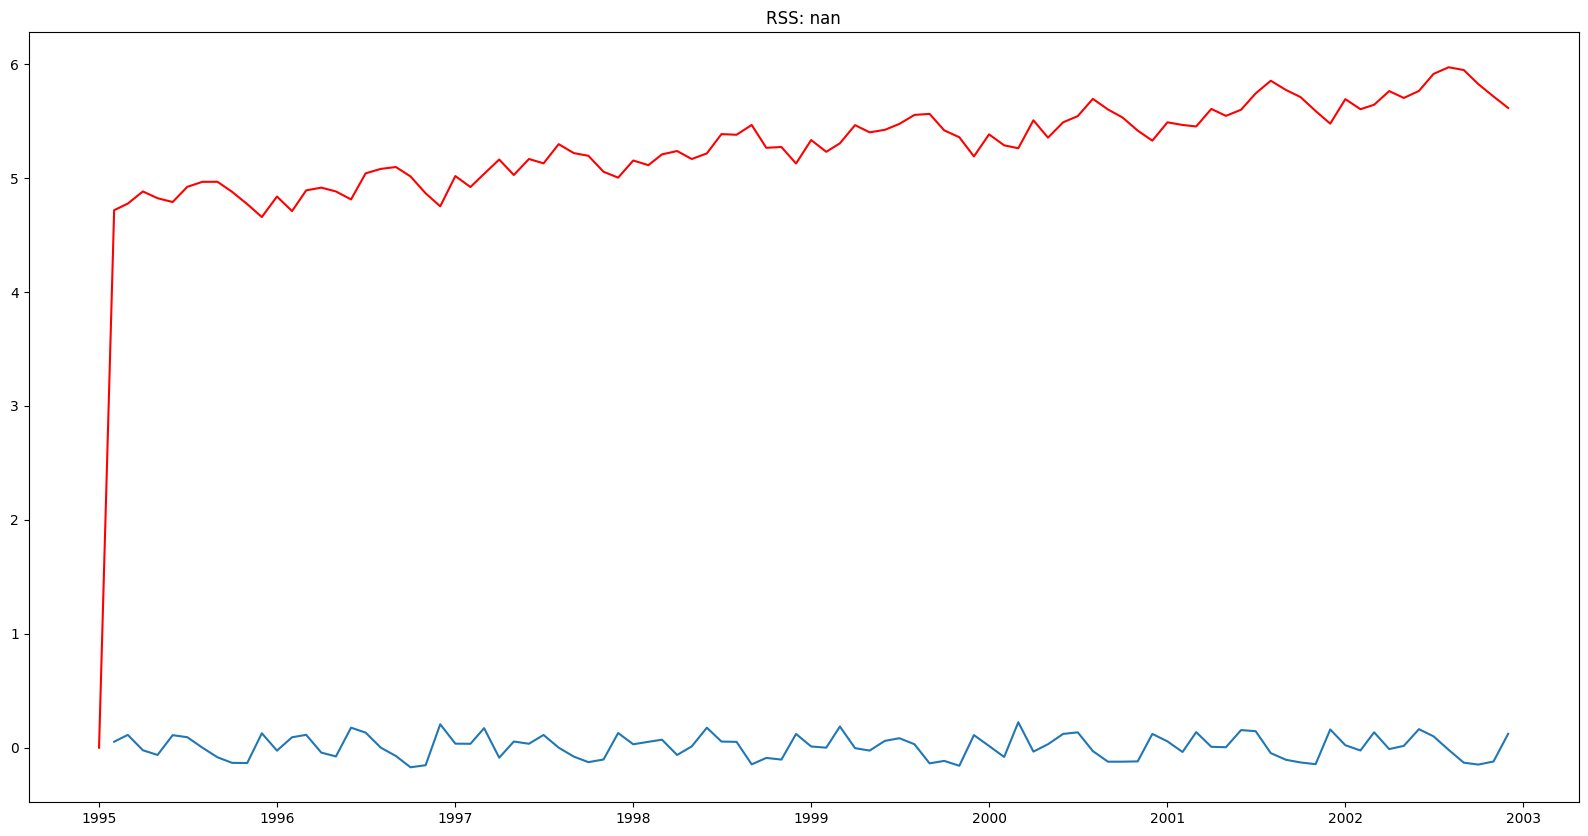

In [35]:
plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [36]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1995-01-01    0.000000
1995-02-01    4.718499
1995-03-01    4.776292
1995-04-01    4.882912
1995-05-01    4.823606
dtype: float64


In [37]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-01-01     0.000000
1995-02-01     4.718499
1995-03-01     9.494791
1995-04-01    14.377703
1995-05-01    19.201309
dtype: float64


In [38]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1995-01-01     4.718499
1995-02-01     9.489184
1995-03-01    14.377593
1995-04-01    19.237515
1995-05-01    23.997100
dtype: float64

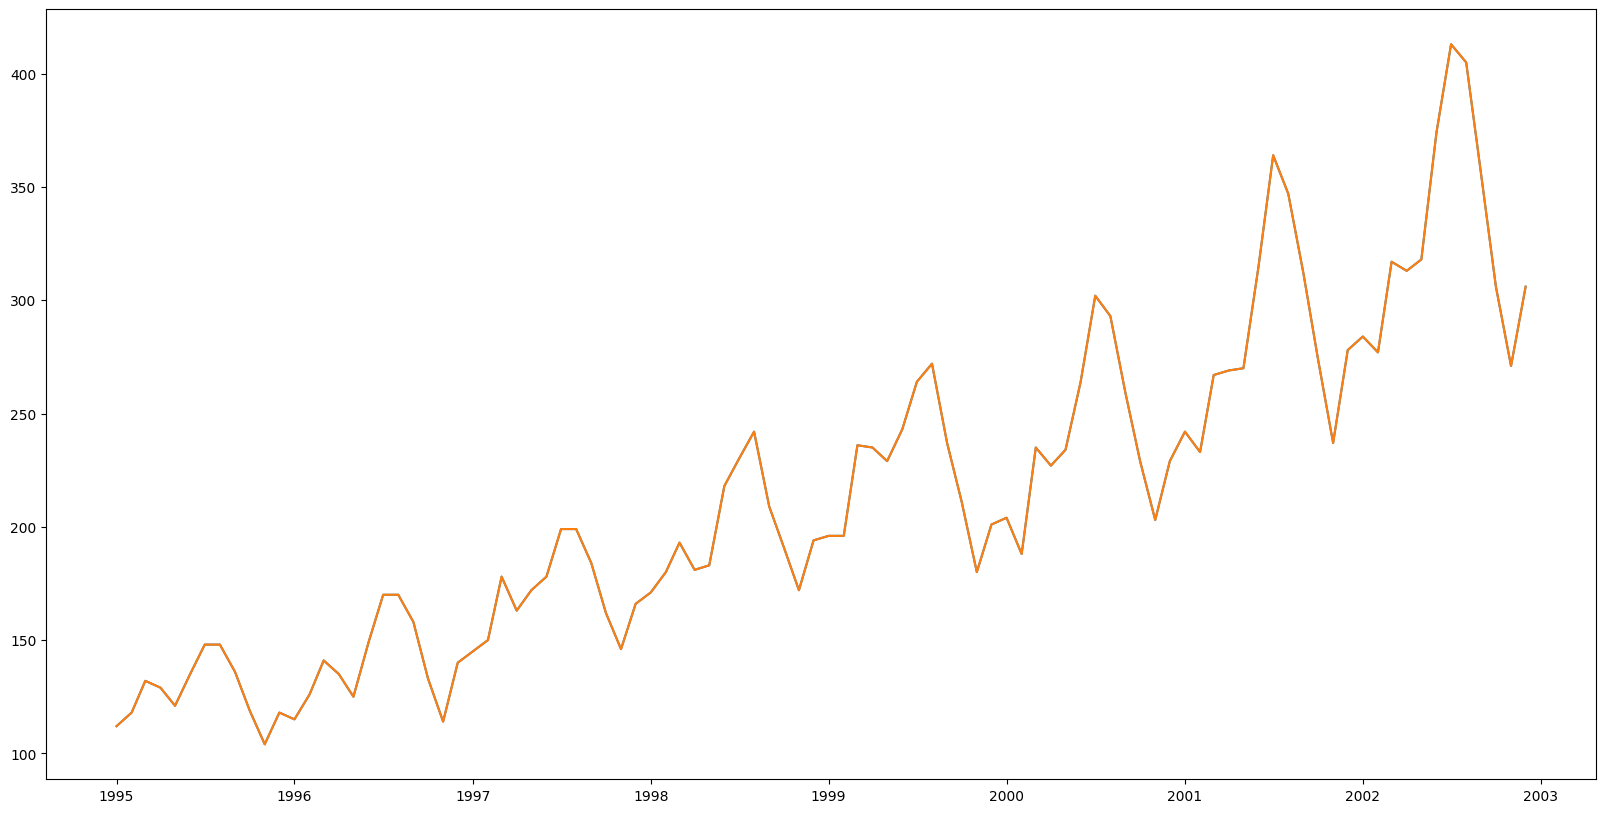

In [39]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

In [47]:
results.forecast(steps=120)

2003-01-01    5.785476
2003-02-01    5.763414
2003-03-01    5.768748
2003-04-01    5.766117
2003-05-01    5.766367
                ...   
2012-08-01    5.765645
2012-09-01    5.765645
2012-10-01    5.765645
2012-11-01    5.765645
2012-12-01    5.765645
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64